In [1]:
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
book_dir = "./Gutenberg/Books/"

In [4]:
from collections import Counter

def read_book(title_path):
    """Read a book and return it as a string"""
    with open(title_path,'r',encoding="utf8") as cur_file:
        text = cur_file.read()
        text = text.replace("\n","").replace("\r","")
    return text

def count_words_inbuilt(text):
    """Count the number of times each word occurs in text(str).Return dictionary where keys are unique words
    and values are word counts . Skip punctuation"""
    text = text.lower()
    skips = [".",",",";",":","'",'"']
    for ch in skips:
        text = text.replace(ch,"")
    word_counts = Counter(text.split(" "))
    return word_counts

def word_stats(word_counts):
    """Return number of unique and word frequency"""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [5]:
import pandas as pd

In [6]:
stats = pd.DataFrame(columns=("Language","Author","Title","Lenght","Unique_Word"))
title_count = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/"+author):
            inputfile = book_dir + "/" + language + "/"+author + "/" + title
            #print(inputfile)
            text = read_book(inputfile)
            (num_unique,counts) = word_stats(count_words_inbuilt(text))
            stats.loc[title_count] = language , author.capitalize() , title.replace(".txt","") ,sum(counts),num_unique
            title_count +=1

In [7]:
stats.head()

,Language,Author,Title,Lenght,Unique_Word
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


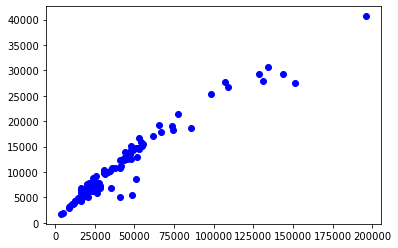

In [10]:
plt.plot(stats.Lenght,stats.Unique_Word,"bo");

In [12]:
stats[stats.Language == "English"]

,Language,Author,Title,Lenght,Unique_Word
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978


Text(0, 0.5, 'Number of unique words')

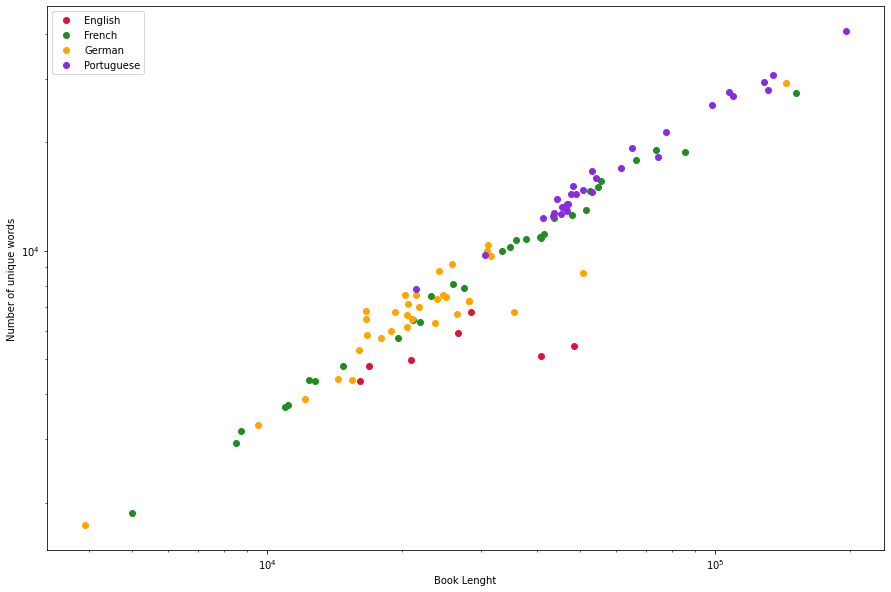

In [22]:
plt.figure(figsize=(15,10))
subset = stats[stats.Language == "English"]
plt.loglog(subset.Lenght,subset.Unique_Word,"o",label ="English",color = "crimson")
subset = stats[stats.Language == "French"]
plt.loglog(subset.Lenght,subset.Unique_Word,"o",label ="French",color = "forestgreen")
subset = stats[stats.Language == "German"]
plt.loglog(subset.Lenght,subset.Unique_Word,"o",label ="German",color = "orange")
subset = stats[stats.Language == "Portuguese"]
plt.loglog(subset.Lenght,subset.Unique_Word,"o",label ="Portuguese",color = "blueviolet")
plt.legend()
plt.xlabel("Book Lenght")
plt.ylabel("Number of unique words")